In [3]:
# import requests

# # Define the API endpoint with the latitude and longitude parameters
# url = "https://transport.data.gouv.fr/api/aoms"
# params = {
#     "lon": 48.8584,  # Longitude
#     "lat": 2.2945   # Latitude
# }

# # Make the GET request to the API
# response = requests.get(url, params=params)

# # Check if the request was successful
# if response.status_code == 200:
#     # Parse the JSON response
#     data = response.json()
#     # Print the resulting data
#     print("Response data:", data)
# else:
#     print(f"Error: {response.status_code}, {response.text}")


Response data: None


In [51]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Function to read gzipped CSV file
def read_gzipped_csv(file_path):
    with gzip.open(file_path, 'rt', encoding='utf-8') as f:
        return pd.read_csv(f)

# Load the listings data
df_listings = read_gzipped_csv('listings.csv.gz')

# Display basic information about the dataset
print(df_listings.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95885 entries, 0 to 95884
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            95885 non-null  int64  
 1   listing_url                                   95885 non-null  object 
 2   scrape_id                                     95885 non-null  int64  
 3   last_scraped                                  95885 non-null  object 
 4   source                                        95885 non-null  object 
 5   name                                          95885 non-null  object 
 6   description                                   91500 non-null  object 
 7   neighborhood_overview                         49357 non-null  object 
 8   picture_url                                   95883 non-null  object 
 9   host_id                                       95885 non-null 

In [79]:
df_listings.columns.to_numpy().tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

In [61]:

# #Basic cleaning
# if 'price' in df_listings.columns:
#     df_listings['price'] = df_listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Basic statistical summary
print(df_listings.describe())

df_listings.describe()

                 id     scrape_id       host_id  host_listings_count  \
count  9.588500e+04  9.588500e+04  9.588500e+04         95877.000000   
mean   5.827639e+17  2.024061e+13  1.741148e+08            29.765908   
std    4.928646e+17  0.000000e+00  1.939141e+08           119.963467   
min    3.109000e+03  2.024061e+13  2.626000e+03             0.000000   
25%    3.234841e+07  2.024061e+13  1.900162e+07             1.000000   
50%    7.811895e+17  2.024061e+13  6.903526e+07             1.000000   
75%    1.059345e+18  2.024061e+13  3.155496e+08             3.000000   
max    1.176033e+18  2.024061e+13  5.824568e+08          3231.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               95877.000000                           0.0  95885.000000   
mean                   36.685482                           NaN     48.864132   
std                   150.165210                           NaN      0.018397   
min                     0.00000

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.588500e+04,9.588500e+04,9.588500e+04,95877.000000,95877.000000,0.0,95885.000000,95885.000000,95885.000000,74587.000000,...,63586.000000,63575.000000,63584.000000,63577.000000,63575.000000,95885.000000,95885.000000,95885.000000,95885.000000,63697.000000
mean,5.827639e+17,2.024061e+13,1.741148e+08,29.765908,36.685482,NaN,48.864132,2.342900,3.260917,1.202978,...,4.655191,4.809757,4.832244,4.816188,4.631279,21.602326,20.832403,0.691370,0.016760,1.121445
std,4.928646e+17,0.000000e+00,1.939141e+08,119.963467,150.165210,NaN,0.018397,0.034722,1.666523,0.562033,...,0.446047,0.358479,0.345980,0.310924,0.428496,84.659243,83.985130,7.211487,0.310229,1.399308
min,3.109000e+03,2.024061e+13,2.626000e+03,0.000000,0.000000,NaN,48.816080,2.227178,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.234841e+07,2.024061e+13,1.900162e+07,1.000000,1.000000,NaN,48.850430,2.320122,2.000000,1.000000,...,4.500000,4.770000,4.800000,4.750000,4.500000,1.000000,1.000000,0.000000,0.000000,0.210000
50%,7.811895e+17,2.024061e+13,6.903526e+07,1.000000,2.000000,NaN,48.865410,2.346660,3.000000,1.000000,...,4.780000,4.920000,4.960000,4.920000,4.730000,1.000000,1.000000,0.000000,0.000000,0.650000
75%,1.059345e+18,2.024061e+13,3.155496e+08,3.000000,4.000000,NaN,48.879280,2.368821,4.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,4.910000,2.000000,1.000000,0.000000,0.000000,1.510000
max,1.176033e+18,2.024061e+13,5.824568e+08,3231.000000,6278.000000,NaN,48.901670,2.468360,16.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,730.000000,730.000000,143.000000,11.000000,43.720000


In [62]:
# Top 10 most common property types
print(df_listings['property_type'].value_counts().head(10))

property_type
Entire rental unit                   80516
Private room in rental unit           5980
Entire condo                          2679
Room in boutique hotel                1256
Entire loft                           1007
Room in hotel                         1003
Entire home                            696
Private room in bed and breakfast      590
Private room in condo                  344
Entire serviced apartment              277
Name: count, dtype: int64


In [72]:
# Average price by neighborhood
avg_price_by_neighborhood = df_listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)
print(avg_price_by_neighborhood.head(10))

neighbourhood_cleansed
Passy                  522.344147
Élysée                 496.991481
Palais-Bourbon         470.621886
Louvre                 379.477286
Luxembourg             355.556762
Hôtel-de-Ville         318.686652
Opéra                  314.446648
Batignolles-Monceau    299.601737
Temple                 292.591432
Bourse                 278.275572
Name: price, dtype: float64


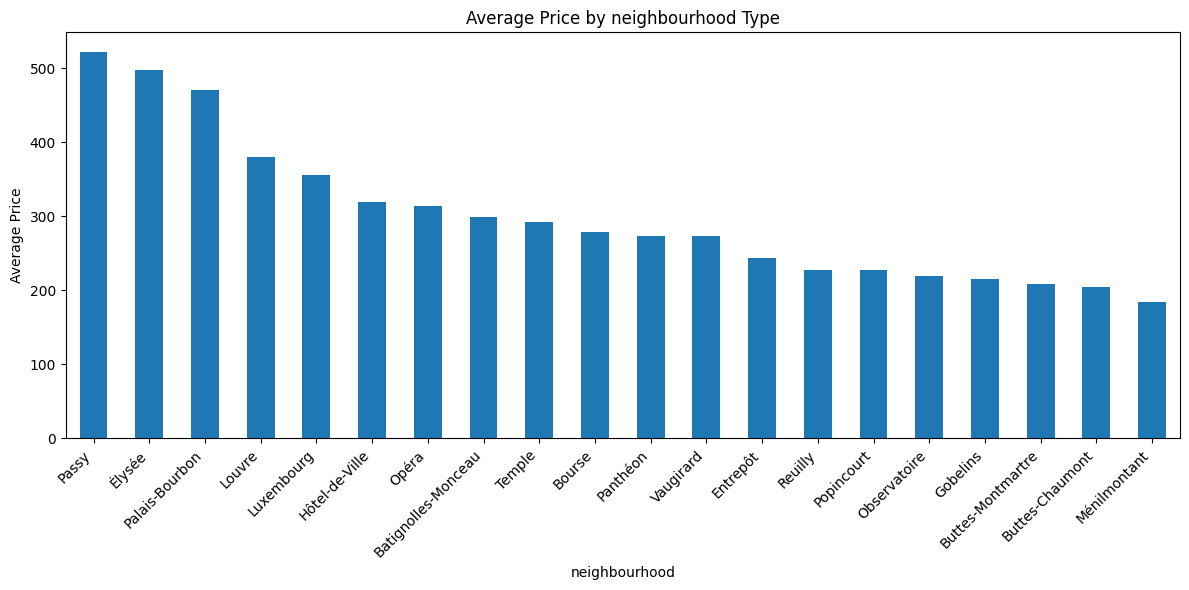

In [73]:
# average price by neighbourhood
plt.figure(figsize=(12, 6))
avg_price_by_neighborhood.plot(kind='bar')
plt.title('Average Price by neighbourhood Type')
plt.xlabel('neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

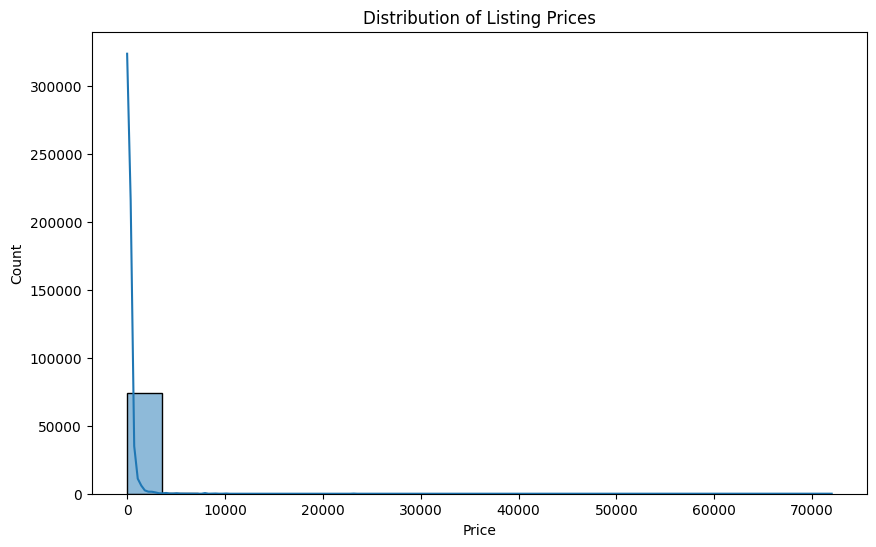

In [78]:

# Visualize price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_listings['price'], bins=20, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


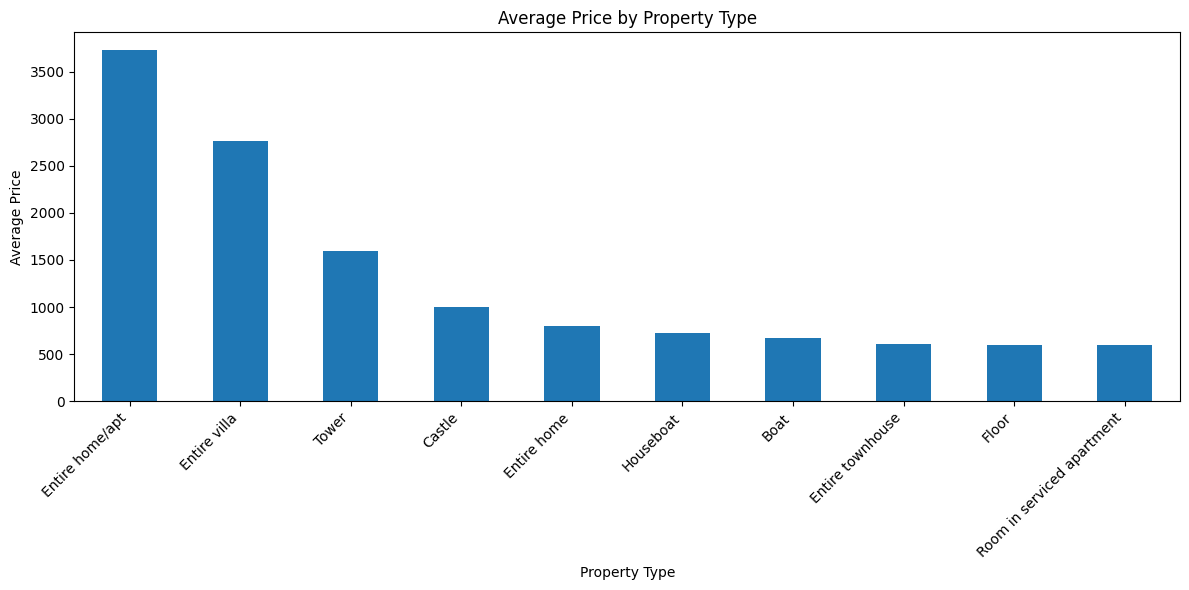

Analysis completed. Cleaned data saved as 'cleaned_listings.csv'.
Visualizations saved as 'price_distribution.png' and 'avg_price_by_property_type.png'.


In [32]:

# Visualize average price by property type
plt.figure(figsize=(12, 6))
df_listings.groupby('property_type')['price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Save cleaned data
df_listings.to_csv('cleaned_listings.csv', index=False)

print("Analysis completed. Cleaned data saved as 'cleaned_listings.csv'.")
print("Visualizations saved as 'price_distribution.png' and 'avg_price_by_property_type.png'.")

<>:31: SyntaxWarning: invalid escape sequence '\d'
<>:31: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bbode\AppData\Local\Temp\ipykernel_4320\2425375768.py:31: SyntaxWarning: invalid escape sequence '\d'
  df_listings['bathrooms'] = df_listings['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)


                 id       host_id                     host_since  \
count  9.588500e+04  9.588500e+04                          95877   
mean   5.827639e+17  1.741148e+08  2017-05-21 19:04:17.166995200   
min    3.109000e+03  2.626000e+03            2008-08-30 00:00:00   
25%    3.234841e+07  1.900162e+07            2014-08-06 00:00:00   
50%    7.811895e+17  6.903526e+07            2016-05-01 00:00:00   
75%    1.059345e+18  3.155496e+08            2019-12-08 00:00:00   
max    1.176033e+18  5.824568e+08            2024-06-09 00:00:00   
std    4.928646e+17  1.939141e+08                            NaN   

           latitude     longitude  accommodates      bedrooms          beds  \
count  95885.000000  95885.000000  95885.000000  89718.000000  74455.000000   
mean      48.864132      2.342900      3.260917      1.344468      1.573447   
min       48.816080      2.227178      1.000000      0.000000      0.000000   
25%       48.850430      2.320122      2.000000      1.000000      1.00

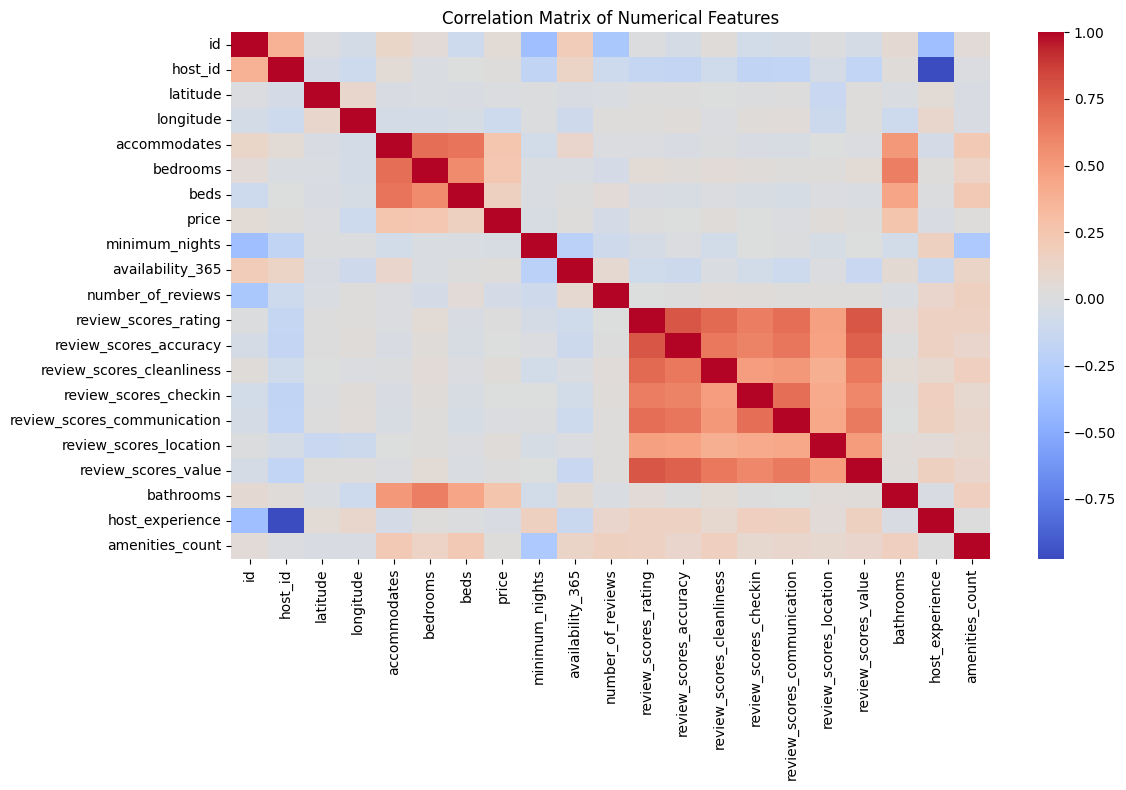

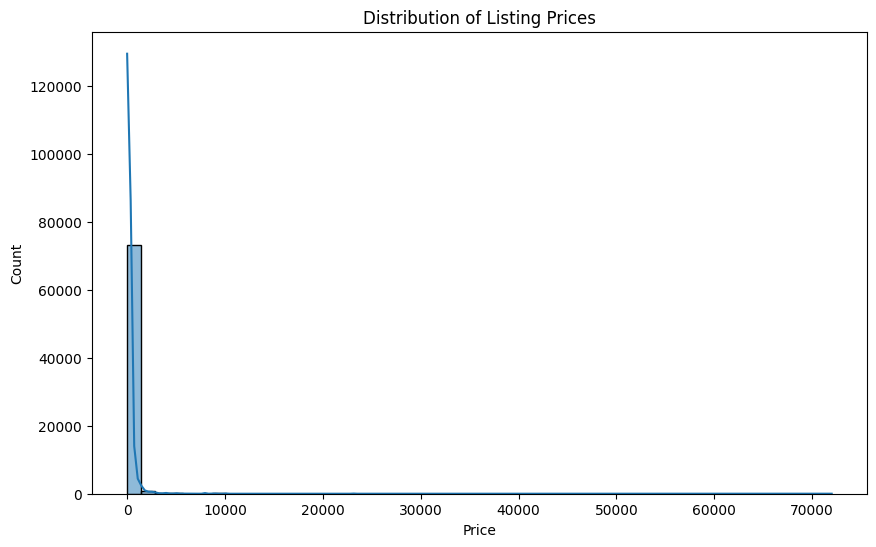

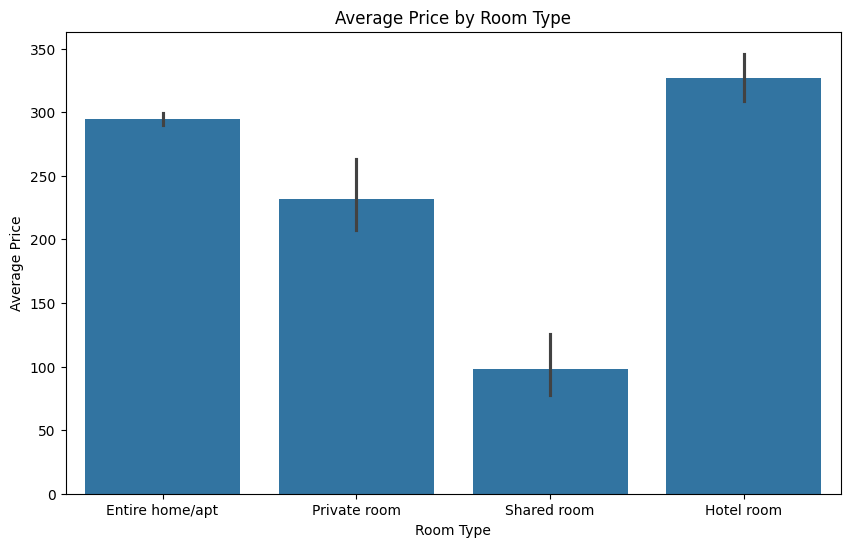

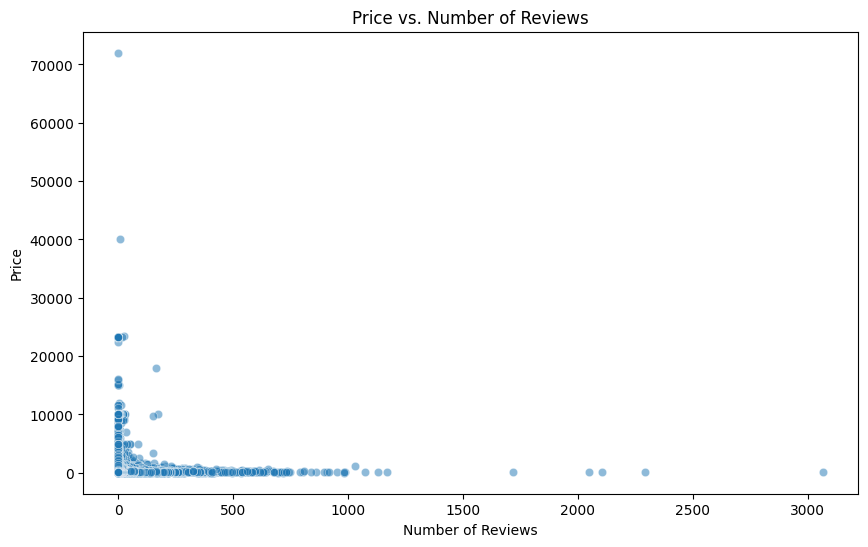

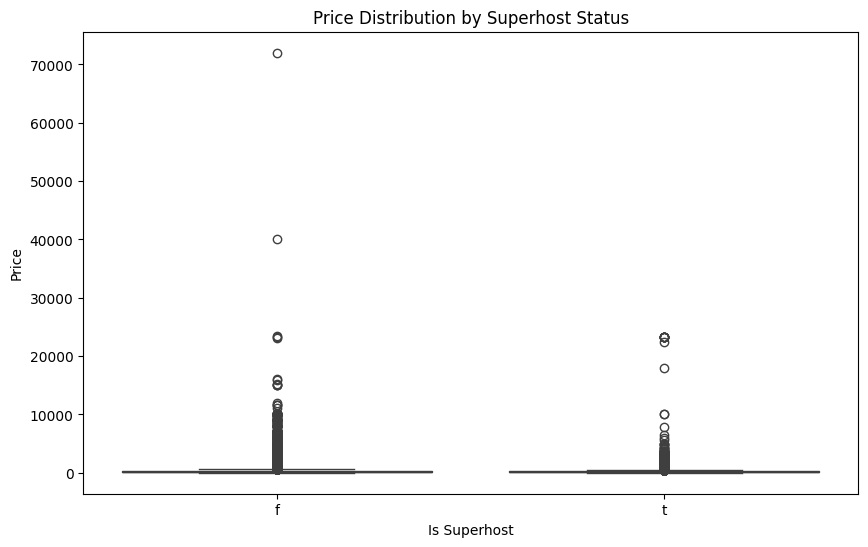

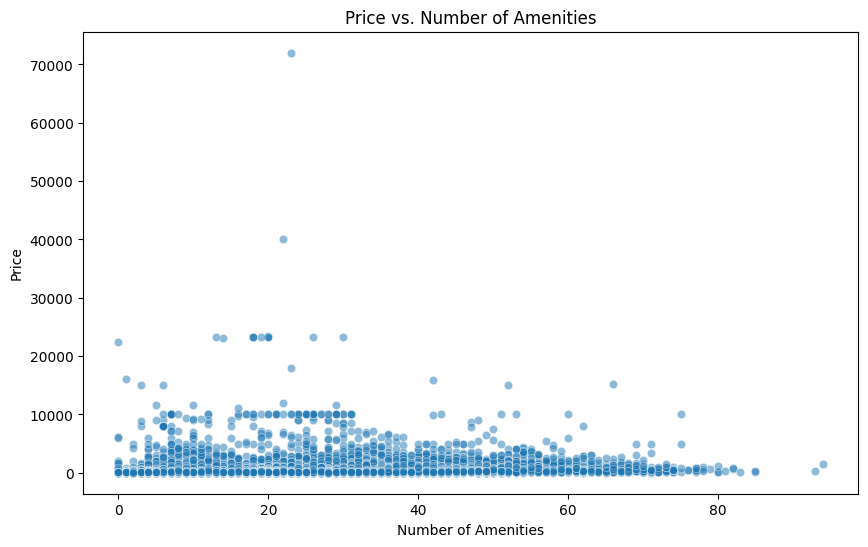

Analysis completed. Cleaned data saved as 'cleaned_listings.csv'.
Visualizations saved as PNG files.

Top 10 neighborhoods by average price:
neighbourhood
Neighborhood highlights    270.360823
Name: price, dtype: float64

Average price by property type:
property_type
Entire home/apt               3729.625000
Entire villa                  2767.315789
Tower                         1600.000000
Castle                         997.000000
Entire home                    798.260365
Houseboat                      722.666667
Boat                           670.250000
Entire townhouse               604.828326
Floor                          600.000000
Room in serviced apartment     593.562500
Name: price, dtype: float64

Correlation between price and review scores:
price                          1.000000
review_scores_location         0.034409
review_scores_cleanliness      0.031762
review_scores_value            0.018665
review_scores_rating           0.015393
review_scores_checkin          0.00810

In [81]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to read gzipped CSV file
def read_gzipped_csv(file_path):
    with gzip.open(file_path, 'rt', encoding='utf-8') as f:
        return pd.read_csv(f)

# Load the listings data
df_listings = read_gzipped_csv('listings.csv.gz')

# Select relevant columns
relevant_columns = [
    'id', 'name', 'host_id', 'host_name', 'host_since', 'host_is_superhost',
    'neighbourhood', 'latitude', 'longitude', 'property_type', 'room_type',
    'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
    'price', 'minimum_nights', 'availability_365', 'number_of_reviews',
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'instant_bookable'
]

df_listings = df_listings[relevant_columns]

# Clean and preprocess data
df_listings['price'] = df_listings['price'].str.replace('$', '').str.replace(',', '').astype(float)
df_listings['host_since'] = pd.to_datetime(df_listings['host_since'])
df_listings['bathrooms'] = df_listings['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)
df_listings['host_experience'] = (pd.Timestamp.now() - df_listings['host_since']).dt.days

# Function to count amenities
def count_amenities(amenities_str):
    return len(eval(amenities_str))

df_listings['amenities_count'] = df_listings['amenities'].apply(count_amenities)

# Basic statistical summary
print(df_listings.describe())

# Correlation matrix
correlation_matrix = df_listings.select_dtypes(include=[np.number]).corr()

# Visualizations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_listings['price'], bins=50, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Average price by room type
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=df_listings)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

# Scatter plot of price vs. number of reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df_listings, alpha=0.5)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

# Box plot of price by superhost status
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='price', data=df_listings)
plt.title('Price Distribution by Superhost Status')
plt.xlabel('Is Superhost')
plt.ylabel('Price')
plt.show()

# Amenities count vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amenities_count', y='price', data=df_listings, alpha=0.5)
plt.title('Price vs. Number of Amenities')
plt.xlabel('Number of Amenities')
plt.ylabel('Price')
plt.show()

# Save cleaned data
df_listings.to_csv('cleaned_listings_another.csv', index=False)

print("Analysis completed. Cleaned data saved as 'cleaned_listings.csv'.")
print("Visualizations saved as PNG files.")

# Additional analysis
print("\nTop 10 neighborhoods by average price:")
print(df_listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10))

print("\nAverage price by property type:")
print(df_listings.groupby('property_type')['price'].mean().sort_values(ascending=False).head(10))

print("\nCorrelation between price and review scores:")
print(df_listings[['price', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                   'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                   'review_scores_value']].corr()['price'].sort_values(ascending=False))